<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/LAB_05_MOD_V_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Regresión Lineal Múltiple --Predicción de Emisión de CO2
## [M.Sc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

## About this Notebook
En este Notebook, aprendemos cómo usar scikit-learn para implementar la regresión lineal múltiple. Descargamos un conjunto de datos relacionado con el consumo de combustible y la emisión de dióxido de carbono de los automóviles. Luego, dividimos nuestros datos en conjuntos de entrenamiento y prueba, creamos un modelo usando el conjunto de entrenamiento, evaluamos su modelo usando el conjunto de prueba y finalmente usamos el modelo para predecir un valor desconocido
## Tabla de contenidos
1. Comprendiendo la data
2. Leer los datos
3. Modelo Regresión Múltiple
4. Práctica

# 1 Importar las librerías Necesarias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# 2 Descargar o cargar los dataset

In [ ]:
df = pd.read_csv("D:/TECHNOLOGY 2020/EIE/ML con Python/M4_ REGRESIÓN LINEAL/FuelConsumption.csv")

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 3. LEER LOS DATOS NECESARIOS

In [ ]:
# Seleccionar algunos features que queremos usar para la regresón
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


# Grafiquemos los valores de emisión vs enginesize

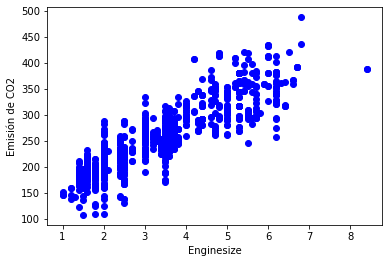

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emisión de CO2")
plt.show()

# 4. Crear un conjunto de datos de Train/Test
La división de entrenamiento / prueba implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba, respectivamente, que son mutuamente excluyentes. Después de lo cual, entrena con el conjunto de entrenamiento y prueba. Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no es parte del conjunto de datos que se ha utilizado para entrenar los datos. Es más realista para problemas del mundo real.

Esto significa que conocemos el resultado de cada punto de datos en este conjunto de datos, ¡lo que lo hace genial para probar! Y dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, es realmente una prueba fuera de la muestra.

In [ ]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

# 5 Distribucción de datos de Train

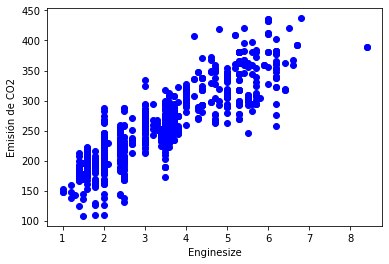

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emisión de CO2")
plt.show()

# 6 Modelo de regresión Múltiple
En realidad, existen múltiples variables que predicen la emisión de Co2. Cuando hay más de una variable independiente, el proceso se denomina regresión lineal múltiple. Por ejemplo, predecir la emisión de co2 utilizando FUELCONSUMPTION_COMB, EngineSize y Cylinders of cars. Lo bueno aquí es que la regresión lineal múltiple es la extensión del modelo de regresión lineal simple.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#LOS COEFICIENTES
print ('coeficiente: ', regr.coef_)

coeficiente:  [[12.37829177  6.78479514  9.10561465]]


Como se mencionó anteriormente, Coeficiente e Intercepción, son los parámetros de la línea de ajuste. Dado que se trata de una regresión lineal múltiple, con 3 parámetros, y sabiendo que los parámetros son la intersección y los coeficientes del hiperplano, sklearn puede estimarlos a partir de nuestros datos. Scikit-learn usa el método simple de mínimos cuadrados ordinarios( **Ordinary Least Squared** )para resolver este problema.

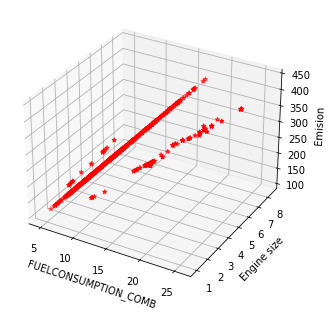

In [ ]:
fig=plt.figure()
ax1 = fig.add_axes([0,0,1,1],projection='3d')
ax1.scatter(train.FUELCONSUMPTION_COMB,train.ENGINESIZE ,train.CO2EMISSIONS, color='red',marker='*')

ax1.set_xlabel('FUELCONSUMPTION_COMB')
ax1.set_ylabel('Engine size')
ax1.set_zlabel('Emision')
plt.show()

# Mínimos cuadrados ordinarios (OLS-Ordinary Least Squares )
OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable dependiente objetivo y las predichas por la función lineal. En otras palabras, intenta minimizar la suma de los errores cuadrados (SSE) o el error cuadrático medio (MSE) entre la variable objetivo (y) y nuestra salida predicha (𝑦̂) en todas las muestras del conjunto de datos.

OLS puede encontrar los mejores parámetros usando los siguientes métodos: - Resolviendo los parámetros del modelo analíticamente usando ecuaciones de forma cerrada - Usando un algoritmo de optimización (Gradient Descent, Stochastic Gradient Descent, Newton's Method, etc.)

# 7 Predicciones

In [ ]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))



Residual sum of squares: 529.23
Variance score: 0.87


# Puntuación de regresión de varianza explicada
Si $\hat{y}$ es el producto objetivo estimado, y el producto objetivo correspondiente (correcto) y Var es la varianza, el cuadrado de la desviación estándar, entonces la varianza explicada se estima de la siguiente manera:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$ 
La mejor puntuación posible es 1.0, los valores más bajos son peores.

# Práctica de Lab
Intente usar una regresión lineal múltiple con el mismo conjunto de datos, pero esta vez use _ FUELCONSUMPTION en CITY__ y __FUELCONSUMPTION en HWY__ en lugar de CONSUMPTION. ¿Da como resultado una mejor precisión?

In [ ]:
# escribe tu código aqui

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[12.36821862  6.39537282  6.11738561  2.65191212]]
Residual sum of squares: 530.52
Variance score: 0.87


# MODELADO PARA 2 VARIABLES

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_x2 = np.asanyarray(train[['ENGINESIZE']])

train_x= np.hstack([train_x1,train_x2])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 9.23030728 20.08525589]]
Intercept:  [81.93891126]


<IPython.core.display.Javascript object>


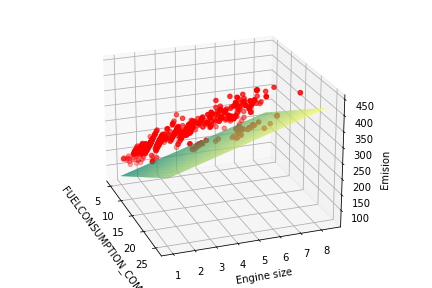

In [ ]:
# Grafica de las salidas

%matplotlib notebook
fig2=plt.figure() #se añade una figura para graficar

ax2 = fig2.add_axes([0,0,1,1],projection='3d') #se añade un eje 3-D

ax2.scatter(train.FUELCONSUMPTION_COMB,train.ENGINESIZE ,train.CO2EMISSIONS, color='red',marker='o')#grafica la dispersion 3-D
ax2.set_xlabel('FUELCONSUMPTION_COMB')
ax2.set_ylabel('Engine size')
ax2.set_zlabel('Emision')

num_puntos=train_x1.shape[0]
x_muestra=np.linspace(train_x1.min(),train_x1.max(),num_puntos)
y_muestra=np.linspace(train_x2.min(),train_x2.max(),num_puntos)
#ax3 = fig2.add_axes([0,0,1,1],projection='3d')
XX,YY=np.meshgrid(x_muestra,y_muestra)
ZZ=regr.coef_[0][0]*XX + regr.coef_[0][1]*YY+regr.coef_[0][0]

ax2.plot_surface(XX, YY, ZZ,cmap='summer') #grafico del plano de regresion

plt.show()

<IPython.core.display.Javascript object>


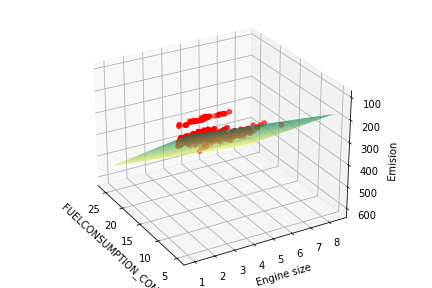

In [ ]:
#Regresion multiple con coeficinetes invertidos

fig3=plt.figure() #se añade una figura para graficar

ax3 = fig3.add_axes([0,0,1,1],projection='3d') #se añade un eje 3-D

ax3.scatter(train.FUELCONSUMPTION_COMB,train.ENGINESIZE ,train.CO2EMISSIONS, color='red',marker='o')#se grafica la dispersion 3-D
ax3.set_xlabel('FUELCONSUMPTION_COMB')
ax3.set_ylabel('Engine size')
ax3.set_zlabel('Emision')

num_puntos=train_x1.shape[0]
x_muestra=np.linspace(train_x1.min(),train_x1.max(),num_puntos)
y_muestra=np.linspace(train_x2.min(),train_x2.max(),num_puntos)

XX,YY=np.meshgrid(x_muestra,y_muestra)
ZZ=regr.coef_[0][0]*YY + regr.coef_[0][1]*XX+regr.coef_[0][0] #se invirtio los coeficientes

ax3.plot_surface(XX, YY, ZZ,cmap='summer') #grafico del plano de regresion

plt.show()